<a href="https://colab.research.google.com/github/AnujKrishnaPhuyal/ComputerVision_multiclass_Classification-/blob/main/Computer_Vision_MultiClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import zipfile
from pathlib import Path


#Setting up path for zip files and extraction of them in respective directory

In [ ]:
# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...") 
        zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


In [ ]:
train_dir = image_path/"train"
test_dir = image_path/"test"
train_dir

PosixPath('data/pizza_steak_sushi/train')

In [ ]:
from PIL import Image
import random

In [ ]:
random.seed(42)
image_list = list(image_path.glob("*/*/*.jpg"))
random_select = random.choice(image_list)
class_name = random_select.parent.stem
class_name
img = Image.open(random_select)
print(class_name,random_select)




sushi data/pizza_steak_sushi/test/sushi/3837522.jpg


#Using matplotlib for image viewing but first convert  images into numpy array list

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

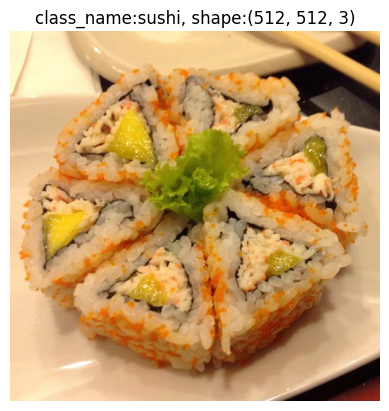

In [ ]:
image_array = np.asarray(img)
plt.imshow(image_array)
plt.title(f"class_name:{class_name}, shape:{image_array.shape}")
plt.axis(False);

#Now transforming the available datas into Tensors first and  in req shape and other things using torch libraries and datsets

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

In [ ]:
data_transform = transforms.Compose(
    [
      transforms.Resize(size=(64,64)),
      transforms.RandomHorizontalFlip(p=0.5),
      transforms.ToTensor()

    ]
)

In [ ]:
def plot_transform_image(image_paths, transorm,n=3,seed=50):
  random.seed(seed)
  rand_image_paths = random.sample(image_paths,k=n)
  for images in rand_image_paths:
    with Image.open(images) as f:
      fig,ax = plt.subplots(1,2)
      #original images
      ax[0].imshow(f)
      ax[0].set_title(f"image size:{f.size}")
      ax[0].axis(False)
      
      #transformed images
      transformed_image = transorm(f).permute(1,2,0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"image size:{transformed_image.shape}")
      ax[1].axis(False)

      fig.suptitle(f"class:{images.parent.stem}")






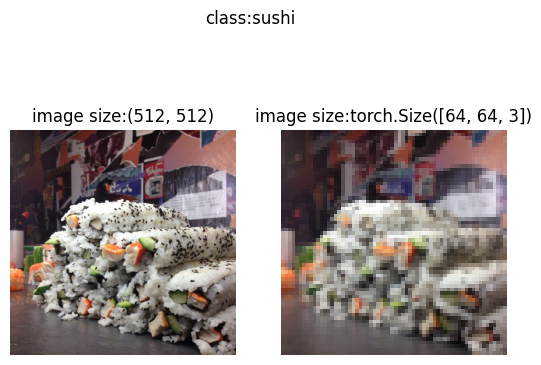

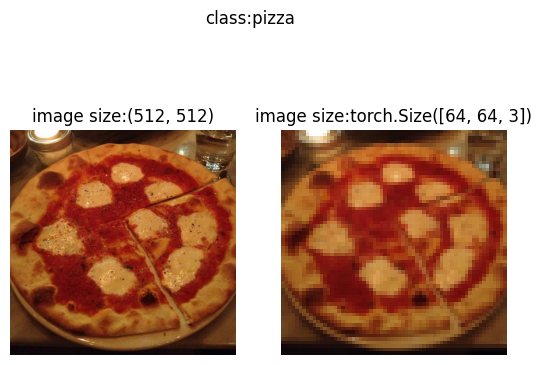

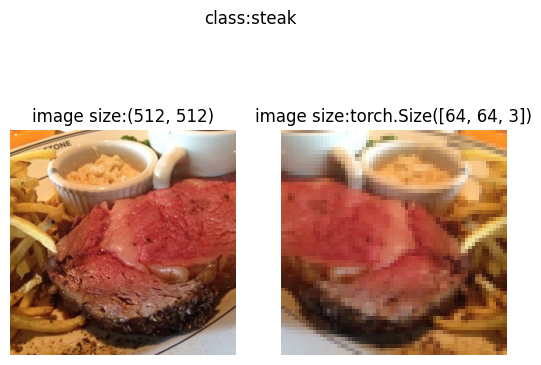

In [ ]:
plot_transform_image(image_list,data_transform,3)

#Now using pytorch ImageFolder for using our train and test datas into req formatting in pytorch

In [ ]:
from torchvision import datasets

In [ ]:
train_data = datasets.ImageFolder(
    root=train_dir,
    transform = data_transform
)
test_data = datasets.ImageFolder(
    root=test_dir,
    transform = data_transform
)
train_data[0][0]

tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0863],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0706],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0196,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.0902, 0.0902, 0.

In [ ]:
img,label =train_data[0][0],train_data[0][1]
img.shape

torch.Size([3, 64, 64])

In [ ]:
class_name = train_data.classes
class_name

['pizza', 'steak', 'sushi']

In [ ]:
img.shape

torch.Size([3, 64, 64])

(torch.Size([3, 64, 64]), torch.Size([64, 64, 3]))

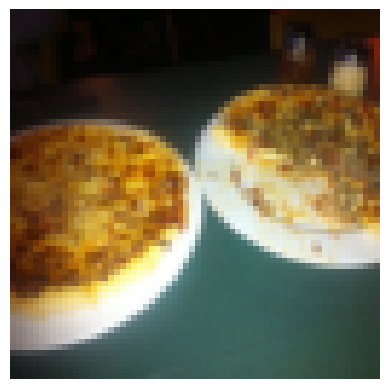

In [ ]:
permuted_image = img.permute(1,2,0)
plt.imshow(permuted_image)
plt.axis(False);
img.shape,permuted_image.shape

In [ ]:
from torch.utils.data import DataLoader
#Dataloader makes our datas/images iterable nad helps to load datas into our model

In [ ]:
import os
os.cpu_count()


2

In [ ]:
Batch_Size=32
train_dataloader= DataLoader(
    dataset=train_data,
    batch_size=Batch_Size,
    shuffle=True    
)
test_dataloader=DataLoader(
    dataset=test_data,
    batch_size=1,
    shuffle=False
)
len(train_dataloader)


8

In [ ]:
image,label=next(iter(train_dataloader))
type(image),image.shape

(torch.Tensor, torch.Size([32, 3, 64, 64]))

In [ ]:
train_data.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
len(train_data.classes)

3

#Preparing our TinyVGG model same architecture from the CNN explainer Site


In [ ]:
from torch import nn

In [ ]:
class TinyVGG(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.conv_block1 = nn.Sequential(
        nn.Conv2d(
                  in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1            
        ),
    nn.ReLU(),
      
 
    nn.MaxPool2d(2)
    )

    self.conv_block2 = nn.Sequential(
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=2,
            stride=1,
            padding=1
        ),
       nn.ReLU(),
       nn.MaxPool2d(2)
    )
    self.conv_block3 = nn.Sequential(
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=2,
            stride=1,
            padding=1
        ),
       nn.ReLU(),
       nn.MaxPool2d(2)
    )
    self.Classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*8*8,
                  out_features=output_shape)
    ) 
  
  def forward(self,x):
    x = self.conv_block1(x)
    # print(f"shape after 1st block:{x.shape}")
    x=self.conv_block2(x)
    # print(f"shape after 2ndt block:{x.shape}")

    x=self.conv_block3(x)
    # print(f"shape after 3rd block:{x.shape}")
    x=self.Classifier(x)
    # print(f"shape of classifier:{x.shape}")
    return x
   
model_0=TinyVGG(3,10,len(train_data.classes))  
model_0

TinyVGG(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block3): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=640, out_features=3, bias=True)
  )
)

#Technique to find the size at classifier input units is preparing radom tensor of same sizer of our test data and evaluate shape from each layers


In [ ]:
rand_tensor = torch.randn(size=(3, 64, 64))
rand_tensor.shape

torch.Size([3, 64, 64])

In [ ]:
y = model_0(rand_tensor.unsqueeze(dim=0))

#Training and Testing


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)


In [ ]:
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.
    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.
    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [ ]:
from tqdm.auto import tqdm

In [ ]:
epochs=3
for epoch in tqdm(range(epochs)):
  train_loss=0
  for batch,(X,y) in enumerate(train_dataloader):
    model_0.train()
    y_pred = model_0(X)
    loss=loss_fn(y_pred,y)
    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_loss/=len(train_dataloader)

  model_0.eval()
  with torch.inference_mode():
    test_loss=0
    test_accuracy=0
    for batch,(X,y) in enumerate(test_dataloader):
      test_pred = model_0(X)
      loss= loss_fn(test_pred,y)
      test_loss+=loss
      acc = accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
      test_accuracy+=acc
      


    test_loss /= len(test_dataloader)
    test_accuracy /= len(test_dataloader)      
      
  if epoch%10==0:
     print(f"epochs:{epoch},,train_loss:{train_loss:.3f}......test_loss:{test_loss:.3f}...test_acc:{test_accuracy:.3f}")    
  




  0%|          | 0/3 [00:00<?, ?it/s]

epochs:0,,train_loss:1.102......test_loss:1.086...test_acc:41.333


In [ ]:
model_0.eval()
with torch.inference_mode():
  loss,acc=0,0
  for X,y in test_dataloader:
    y_prediction = model_0(X)
   
    print(y_prediction.argmax(dim=1),y)
    loss+=loss_fn(y_prediction,y)
    acc+=accuracy_fn(y,y_prediction.argmax(dim=1))
  loss/=len(test_dataloader)
  acc/=len(test_dataloader)  
  
print(f"loss:{loss}....acc:{acc}")

tensor([0]) tensor([0])
tensor([0]) tensor([0])
tensor([0]) tensor([0])
tensor([0]) tensor([0])
tensor([0]) tensor([0])
tensor([0]) tensor([0])
tensor([0]) tensor([0])
tensor([0]) tensor([0])
tensor([0]) tensor([0])
tensor([0]) tensor([0])
tensor([0]) tensor([0])
tensor([0]) tensor([0])
tensor([0]) tensor([0])
tensor([0]) tensor([0])
tensor([0]) tensor([0])
tensor([0]) tensor([0])
tensor([0]) tensor([0])
tensor([0]) tensor([0])
tensor([0]) tensor([0])
tensor([0]) tensor([0])
tensor([0]) tensor([0])
tensor([0]) tensor([0])
tensor([0]) tensor([0])
tensor([0]) tensor([0])
tensor([0]) tensor([0])
tensor([0]) tensor([1])
tensor([0]) tensor([1])
tensor([0]) tensor([1])
tensor([0]) tensor([1])
tensor([0]) tensor([1])
tensor([0]) tensor([1])
tensor([0]) tensor([1])
tensor([0]) tensor([1])
tensor([0]) tensor([1])
tensor([0]) tensor([1])
tensor([0]) tensor([1])
tensor([0]) tensor([1])
tensor([0]) tensor([1])
tensor([0]) tensor([1])
tensor([0]) tensor([1])
tensor([0]) tensor([1])
tensor([0]) tens

## Now time for the predictions

In [ ]:
def make_predictions(model: torch.nn.Module, data: list):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())
            
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

#Importing our custom image and making prediction on them

In [ ]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

In [ ]:
custom_image_path

PosixPath('data/04-pizza-dad.jpeg')

In [ ]:
import torchvision
import torch
# Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

# Print out image data
print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")

Custom image tensor:
tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

Custom image shape: torch.Size([3, 4032, 3024])

Custom image dty

#Now changing the size and datatype of our images

In [ ]:
# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255. 

# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..

Text(0.5, 1.0, 'torch.Size([3, 4032, 3024])')

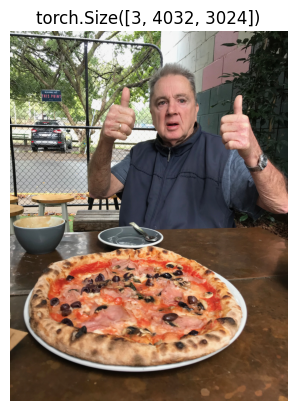

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(custom_image.permute(1,2,0))
plt.axis(False);
plt.title(custom_image.shape)

In [ ]:

from torchvision import datasets,transforms

In [ ]:
custom_image_transform = transforms.Compose([
transforms.Resize((64,64))
])

In [ ]:
transformed_image=custom_image_transform(custom_image)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [ ]:
transformed_image.shape

torch.Size([3, 64, 64])

In [ ]:
model_0.eval()
with torch.inference_mode():
  predict = model_0(transformed_image.unsqueeze(dim=0))
predict  

tensor([[ 0.0428,  0.0013, -0.0512]])

In [ ]:
custom_image_pred= torch.softmax(predict,dim=1)
custom_image_pred

tensor([[0.3485, 0.3343, 0.3172]])

In [ ]:
custom_image_label=torch.argmax(predict,dim=1)
custom_image_label

tensor([0])

In [ ]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
custom_image_class=class_names[custom_image_label]
custom_image_class

'pizza'

#Creating a function for prediction for wholesomeing all above codes inside a single function


In [ ]:
def FinalPred(model:torch.nn.Module,
              transform=None):
  image_list = list(image_path.glob("*/*/*.jpg"))
  rand_image_paths = random.sample(image_list,k=1)
  print(rand_image_paths)
  for path in rand_image_paths:
    custom_image = torchvision.io.read_image(str(path)).type(torch.float32)
    real_class=path.parent.stem
    custom_image = custom_image / 255
    if transform:
      transformed_image = transform(custom_image)
    model_0.eval()
    with torch.inference_mode():
        predict = model_0(transformed_image.unsqueeze(dim=0))
    custom_image_pred= torch.softmax(predict,dim=1)
    custom_image_label=torch.argmax(predict,dim=1)
    custom_image_class=class_names[custom_image_label]
    
    plt.imshow(transformed_image.permute(1,2,0))
    title=(f" Real_class:{real_class}|predicted_class:{custom_image_class}|probability:{custom_image_pred.max():.3f}")
    plt.title(title)
    plt.axis(False);



[PosixPath('data/pizza_steak_sushi/train/pizza/739735.jpg')]


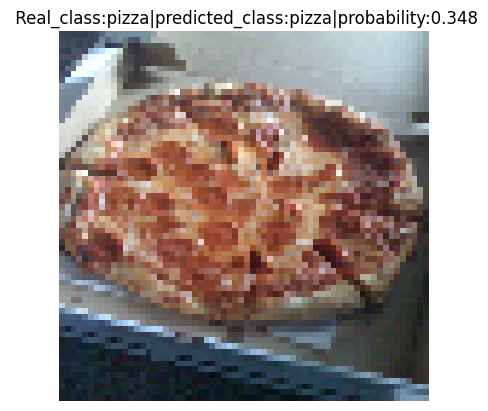

In [ ]:
FinalPred(model_0,custom_image_transform)